In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gstlearn as gl
import gstlearn.plot as gp
import gstlearn.proj as gpd
import os

Le jeu de données du groupe de travail CIEM WGACEGG: densités acoustiques (NASC) d'anchois et de sardine par unité d'échantillonnage de 1 mille nautique de long, observées au printemps 2018 et 2021.

Description des colonnes : 
- survey : campagne
- year : année
- time : date/heure enregistrement donnée
- x : longitude en ° décimal WGS84
- y : latitude en ° décimal WGS84
- NASC : densité acoustique en m2.MN-2
- sp : espèce anchois = "ENGR-ENC"
- sardine ="SARD-PIL"

Pour plus d'infos sur l'origine de ces données : Doray, M., Van Der Kooij, J., Boyra, G. (Eds.), 2021. ICES Survey Protocols - Manual for acoustic surveys coordinated under the ICES Working Group on Acoustic and Egg Surveys for Small Pelagic Fish (WGACEGG). https://doi.org/10.17895/ICES.PUB.7462.

Lecture du fichier de données

In [2]:
dataDir = os.path.join(os.getenv('GSTLEARN_DATA'),"halieutic")
rawDat = pd.read_csv(os.path.join(dataDir,"AC-SPRING-IBBB-NASC_ANE-PIL_2018-2021.csv"),sep=";")
rawDat.head()

,survey,year,time,x,y,NASC,sp
0,AC_SPRING_IBBB,2018,04/05/2018 19:20:00,-9.295565,40.381000,0.0,ENGR-ENC
1,AC_SPRING_IBBB,2018,04/05/2018 19:43:00,-9.229598,40.381582,0.0,ENGR-ENC
2,AC_SPRING_IBBB,2018,04/05/2018 19:58:00,-9.185515,40.382482,0.0,ENGR-ENC
3,AC_SPRING_IBBB,2018,05/05/2018 07:32:00,-9.036932,40.382898,0.0,ENGR-ENC
4,AC_SPRING_IBBB,2018,05/05/2018 07:39:00,-9.014982,40.382750,0.0,ENGR-ENC


In [3]:
dbDat = gl.Db()
for field in ["year","x","y","NASC"] :
    dbDat[field] = rawDat[field]

In [4]:
dbDat.setLocators(["x","y"],gl.ELoc.X)
dbDat.setLocator("NASC",gl.ELoc.Z)

In [5]:
a = gpd.proj(dbDat["x"], dbDat["y"])
dbDat["x"] = a.x
dbDat["y"] = a.y

Lecture du Polygone

In [6]:
csv = gl.CSVformat(True, 0, ";", ".")
poly = gl.Polygons.createFromCSV(os.path.join(dataDir,"WGACEGGspringPolygon.csv"), csv)

In [7]:
a = gpd.proj(poly.getX(0), poly.getY(0))
poly.setX(0,a.x)
poly.setY(0,a.y)

Lecture des traits de cotes.

In [8]:
world = gpd.world(minx=(-10,36), miny=(-1,36), maxx=(-1,49), maxy=(-10,49))

Plotting the world country lines as background and overlay the Points and the Polygon, suing the same CRS.

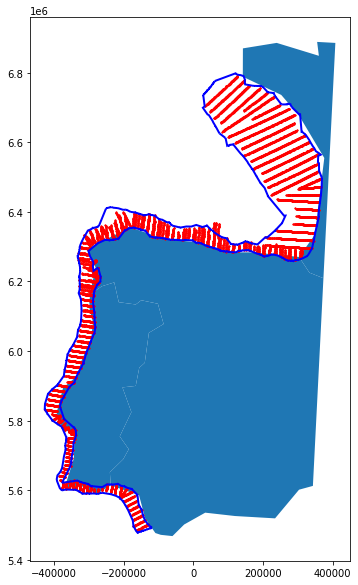

In [9]:
ax = world.plot(figsize=[10,10])
ax = gp.point(dbDat,size=1,ax=ax)
ax = gp.polygon(poly,ax = ax)